In [ ]:
import re
import os
import json
import IPython.core.display

PYNQ_JUPYTER_NOTEBOOKS = '/home/xilinx/jupyter_notebooks'

def draw_wavedrom(data):
    """Display the waveform using the Wavedrom package.

    This method requires 2 javascript files to be present. We get the 
    relative paths for the 2 files in order to proceed.

    Users can call this method directly to draw any wavedrom data.

    Example usage:

    >>> a = {
        'signal': [
            {'name': 'clk', 'wave': 'p.....|...'},
            {'name': 'dat', 'wave': 'x.345x|=.x', 
                            'data': ['head', 'body', 'tail', 'data']},
            {'name': 'req', 'wave': '0.1..0|1.0'},
            {},
            {'name': 'ack', 'wave': '1.....|01.'}
        ]}
    >>> draw_wavedrom(a)

    """
    wavedrom_js = '/js/wavedrom.js'
    wavedromskin_js = '/js/wavedromskin.js'
    if not os.path.isfile(PYNQ_JUPYTER_NOTEBOOKS + wavedrom_js):
        raise RuntimeError('Cannot locate {}.'.format(wavedrom_js))
    if not os.path.isfile(PYNQ_JUPYTER_NOTEBOOKS + wavedromskin_js):
        raise RuntimeError('Cannot locate {}.'.format(wavedromskin_js))
    current_path = os.getcwd()
    relative_path = os.path.relpath(PYNQ_JUPYTER_NOTEBOOKS, current_path)

    htmldata = '<script type="WaveDrom">' + json.dumps(data) + '</script>'
    IPython.core.display.display_html(IPython.core.display.HTML(htmldata))
    jsdata = 'WaveDrom.ProcessAll();'
    IPython.core.display.display_javascript(
        IPython.core.display.Javascript(
            data=jsdata,
            lib=[relative_path + '/js/wavedrom.js',
                 relative_path + '/js/wavedromskin.js']))

In [1]:
from pynq.lib.logictools.waveform import draw_wavedrom

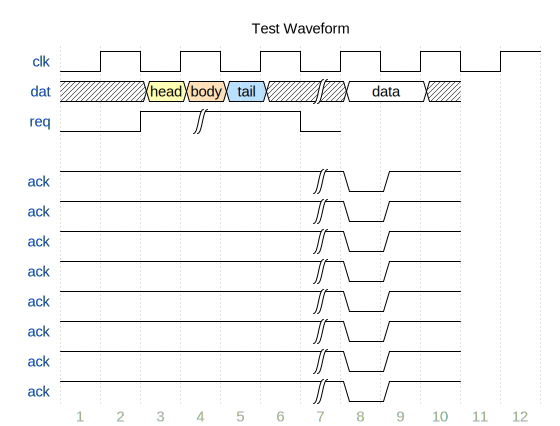

In [4]:
a = {
        'signal': [
            {'name': 'clk', 'wave': 'lh'*6},
            {'name': 'dat', 'wave': 'x.345x|=.x', 
                            'data': ['head', 'body', 'tail', 'data']},
            {'name': 'req', 'wave': 'l.h|..l'},
            {},
            {'name': 'ack', 'wave': '1.....|01.'},
            {'name': 'ack', 'wave': '1.....|01.'},
            {'name': 'ack', 'wave': '1.....|01.'},
            {'name': 'ack', 'wave': '1.....|01.'},
            {'name': 'ack', 'wave': '1.....|01.'},
            {'name': 'ack', 'wave': '1.....|01.'},
            {'name': 'ack', 'wave': '1.....|01.'},{'name': 'ack', 'wave': '1.....|01.'}
        ],
    'head': {'text': 'Test Waveform'},
    'foot':{'tock':1}}
draw_wavedrom(a)

In [ ]:
import json
data = json.dumps(a)
type(data)

In [ ]:
round(0.0137/(1/(0.8 * 1e6)))

In [ ]:
import numpy as np
import re
import copy

def wave_to_bitstring(wave):
    """Function to convert a pattern consisting of `l`, `h`, and dot to a
    sequence of `0` and `1`.

    Parameters
    ----------
    wave : str
        The input string to convert.

    Returns
    -------
    list
        A list of elements, each element being 0 or 1.

    """
    substitution_map = {'l': '0', 'h': '1', '0': '0', '1': '1'}
    def delete_dots(match):
        return substitution_map[match.group()[0]] * len(match.group())

    wave_regex = re.compile(r'[l]\.*|[h]\.*')
    return re.sub(wave_regex, delete_dots, wave)

wave_to_bitstring('l........h................01lh00hhlll11h')

In [ ]:
import numpy as np
import re
import copy

def bitstring_to_wave(bitstring):
    """Function to convert a pattern consisting of `0`, `1` into a sequence
    of `l`, `h`, and dots.
    
    For example, if the bit string is "010011000111", then the result will be
    "lhl.h.l..h..".

    Returns
    -------
    str
        New wave tokens with valid tokens and dots.
    
    """
    substitution_map = {'0': 'l', '1': 'h', '.': '.'}
    def insert_dots(match):
        return substitution_map[match.group()[0]] + \
               '.' * (len(match.group()) - 1)

    bitstr_regex = re.compile(r'[0][0]*|[1][1]*')
    return re.sub(bitstr_regex, insert_dots, bitstring)

bitstring_to_wave('00000000000000111111111111111111110000000000000000000000000000000000000000011100110101')

In [ ]:
import re
pat_in = 'h.....l.....h.l..lh'
regex0 = re.compile('([ln0]\.*)')
regex1 = re.compile('([hp1]\.*)')
matches0 = re.finditer(regex0, pat_in)
matches1 = re.finditer(regex1, pat_in)
for i in matches0:
    pat_in = pat_in.replace(i.group(),"0"*len(i.group()))
for i in matches1:
    pat_in = pat_in.replace(i.group(),"1"*len(i.group()))
print(pat_in)

print(logic2level(pat_in))

In [ ]:
import re
def level2logic(pat_in):
    """Function to convert a pattern consisting of `l`, `h`, and dot to a
    sequence of `0` and `1`.

    Parameters
    ----------
    pat_in : str
        The input string to convert.

    Returns
    -------
    pat_out : str
        The sequence of 0's and 1's converted from the input string.

    """
    regex0 = re.compile('([l0]\.*)')
    regex1 = re.compile('([h1]\.*)')
    pat_out = pat_in
    matches0 = re.finditer(regex0, pat_out)
    matches1 = re.finditer(regex1, pat_out)
    for i in matches0:
        pat_out = pat_out.replace(i.group(), "0" * len(i.group()))
    for i in matches1:
        pat_out = pat_out.replace(i.group(), "1" * len(i.group()))
    return [int(i,10) for i in list(pat_out)]

a = [{'name': 'dat', 'pin': 1, 'wave': '10..111...'},
     {'name': 'req', 'pin': 2, 'wave': 'l.h..01.01'}]

for i in a:
    i['wave'] = level2logic(i['wave'])
    
print(a)

In [ ]:
a = np.array([[1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
     [0, 0, 1, 1, 1, 0, 1, 1, 0, 1]],dtype=np.uint8)
b = a.T.copy()
print(b)

In [ ]:
def bit2sample(bits):
    """Function to convert a bit list into a multi-bit sample.
    
    Example: [1, 1, 1, 0] will be converted to 15.
    
    Parameters
    ----------
    bits : list
        A list of bits, each element being 0 or 1.
    
    Returns
    -------
    int
        An integer converted from the bit samples.
        
    """
    return int("".join(map(str, list(bits))), 2)

print(bit2sample([1,1,1,0]))

In [ ]:
temp_samples = np.array([[1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
     [0, 0, 1, 1, 1, 0, 1, 1, 0, 1]],dtype=np.uint8)
samples = np.apply_along_axis(bit2sample, 1, temp_samples)
print(type(samples))

In [ ]:
x = np.array([1,3, 9])
print(x)
print("length is {}".format(len(np.unpackbits(x.view(np.uint8)))))
print(np.unpackbits(x.view(np.uint8)))

In [ ]:
x = np.array([1256,2048],dtype=np.uint8)
reversed_x = x[::-1]
print(reversed_x)
print(np.unpackbits(reversed_x))

In [ ]:
data = b'\xAD\xDE\xDE\xC0'
swap_data = bytearray(data)
swap_data.reverse()
print(swap_data)

In [ ]:
x = np.array([[100,101,102,103,104,105]],dtype='>i4')
data = x.tobytes()
y = bytearray(data)
print("Byte array: {}".format(y))
rev = np.frombuffer(y,dtype=np.uint8)
bit_array = np.unpackbits(rev)
final = bit_array.reshape(6,32).T
final[::-1]

In [ ]:
x = np.array([[100,101,102,103,104,105]],dtype='uint64')
y = np.zeros((1,6),dtype='>i8')
np.copyto(y,x)
rev = np.frombuffer(y,dtype=np.uint8)
bit_array = np.unpackbits(rev)
final = bit_array.reshape(6,64).T
final[::-1]

In [ ]:
x=np.arange(12).reshape(3,4).copy()
print(f'no transpose: {x} {x.flags}')
y = x.T.copy()
print(f'after transpose: {y} {y.flags}')

In [ ]:
temp_lanes = np.zeros((5,10),dtype=np.uint8)
temp_lanes[1] = [1]*10
print(temp_lanes)
print(f'{temp_lanes.flags}')

In [ ]:
a = int('11',2)
b = np.uint32(a)
print(b,type(b))

In [ ]:
dst_samples = np.zeros((2,1), dtype=np.uint64)
dst_samples.flags

In [ ]:
a = np.zeros((5,1),dtype=np.uint64)
j = 1
for j in range(5):
    a[j] = j
    j+=1
print(a, len(a))

temp_samples = np.zeros((5,1),dtype='>i8')
np.copyto(temp_samples, a)
rev = np.frombuffer(temp_samples,dtype=np.uint8)
bit_array = np.unpackbits(rev)
final = bit_array.reshape(5,64).T[::-1].copy()
print(final)
for i in range(10):
    xx = final[i].astype(str).tolist()
    sample = ''.join(xx)
    print(f'Lane{i} is {sample}')

In [ ]:
import numpy as np
import ctypes
a = np.ones(5000,dtype=np.uint32)
print(a)
pointer1, ro_flag = a.__array_interface__['data']
print(f'Using interface: {pointer1}, {ro_flag}')
pointer2 = a.ctypes.data
print(f'using ctypes: {pointer2}')

In [ ]:
import cffi
ffi = cffi.FFI()
b = ffi.cast('uint32_t*',pointer2)
b[4999]=99
print(a)
print(a.flags)

In [ ]:
import re
m = re.match('h','hello')
print(type(m))
if m:
    print(m.group())

In [ ]:
a = {1:1, 2:2}
b = a.copy()
b[1]=99
print(a,b)

### Examples using Graphviz

References: http://pygraphviz.github.io/documentation/latest/pygraphviz.pdf

In [ ]:
%%writefile test.dot
digraph {
    graph [splines=true overlap=false]
    ratio=auto
    START
    offline
    scanning
    "joining&#8260;000"
    online [peripheries=2]
    START -> offline
    offline -> scanning [label="scan&#8260;scan2"]
    offline -> offline [label="failed scan"]
    scanning -> "joining&#8260;000" [label="detected"]
    scanning -> offline [label="failed join"]
    "joining&#8260;000" -> online [label="handshake"]
    "joining&#8260;000" -> offline [label="failed handshake"]
    online -> offline [label="timeout"]
}

In [ ]:
import os
import pygraphviz as pgv
from IPython.display import Image, display
B=pgv.AGraph('test.dot')
B.layout(prog='dot')
B.draw('test.png')
display(Image(filename='test.png'))
os.system("rm -rf test.png test.dot")

In [ ]:
a = (0,1,2,3)
print(a[0],a[3])

In [ ]:
OUTPUT_PIN_MAP = {'D0':0,
                 'D1':1,
                 'D2':2,
                 'D3':3,
                 'D4':4,
                 'D5':5,
                 'D6':6,
                 'D7':7,
                 'D8':8,
                 'D9':9,
                 'D10':10,
                 'D11':11,
                 'D12':12,
                 'D13':13,
                 'D14':14,
                 'D15':15,
                 'D16':16,
                 'D17':17,
                 'D18':18,
                 'D19':19}

fsm_spec = {'inputs': [('reset','D0'), ('direction','D1')],
    'outputs': [('alpha','D3'), ('beta','D4'), ('gamma','D5')],
    'states': ('S0', 'S1', 'S2', 'S3', 'S4', 'S5'),
    'transitions': [['00', 'S0', 'S1', '000'],
                    ['01', 'S0', 'S5', '000'],
                    ['00', 'S1', 'S2', '001'],
                    ['01', 'S1', 'S0', '001'],
                    ['00', 'S2', 'S3', '010'],
                    ['01', 'S2', 'S1', '010'],
                    ['00', 'S3', 'S4', '011'],
                    ['01', 'S3', 'S2', '011'],
                    ['00', 'S4', 'S5', '100'],
                    ['01', 'S4', 'S3', '100'],
                    ['00', 'S5', 'S0', '101'],
                    ['01', 'S5', 'S4', '101'],
                    ['1-', '*',  'S0', '']]}

In [ ]:
def check_pins(fsm_spec, key):
    """Check whether the pins specified are in a valid range.

    This method will raise an exception if `pin` is out of range.

    Parameters
    ----------
    fsm_spec : dict
        The dictionary where the check to be made.
    key : object
        The key to index the dictionary.

    """
    for i in fsm_spec[key]:
        if i[1] not in OUTPUT_PIN_MAP:
            raise ValueError("Valid pins should be D0 - D19.")
                
check_pins(fsm_spec,'outputs')

In [ ]:
import numpy as np
tri = np.array([0,1,1,0])
arr0 = np.array([1,3,5,7])
arr1 = np.array([2,4,6,8])
condlist = [tri==0, tri==1]
choicelist = [arr0, arr1]
np.select(condlist, choicelist)

In [ ]:
a = [1,2,3]
b= [3,4]
a += b
print(a)

In [ ]:
a = [1,2,3]
b = [4,5,6,7]

def merge_to_length(a,b,length):
    temp = b[:]
    for index,item in enumerate(a):
        if len(temp)<length:
            temp.insert(index,item)
        else:
            break
    return temp
    

print(merge_to_length(a,b,9))

In [ ]:
a = '011'
b = '000'
print(''.join(merge_to_length(list(a),list(b),5)))

In [ ]:
a = (1,0)
b = (2,a[1])
print(b)

In [ ]:
import re
expr_in = "D5 & ~(D6 | ~D7)"
pin_id = re.split("\||\^|\&", expr_in.strip())
print(pin_id)

In [ ]:
expr_in = "D5 & ~(D6 | ~D7)"
pin_id = re.sub("\W+", " ", expr_in).strip().split(' ')
print(pin_id)

In [ ]:
import difflib

d = difflib.Differ()
diff = d.compare(string1, string2)
print(list(diff))

In [ ]:
dif = [i for i in range(len(string1)) if string1[i]!=string2[i]]
if len(dif)==1:
    res_list = list(string1)
    res_list[dif[0]]='-'
    result = ''.join(res_list)
print(result)

In [ ]:
import itertools

def merge_to_wildcards(str_list):
    """Merge all the strings inside a list into wildcard representation.

    This method will check every pair inside the string list, and merge the
    strings based on wildcard representation. For example, the list 
    ['100101', '000101', '000111', '100111'] will be merged to ['-001-1'];
    the list ['10','00','01'] will be merged to ['1-', '0-'].

    Parameters
    ----------
    str_list : list
        A list of strings, where all the elements have the same length.

    Returns
    -------
    list
        A merged list, where strings are expressed in wildcard format.

    """
    output_list = str_list[:]
    new_pattern = True
    while new_pattern:
        new_pattern = False
        input_list = output_list[:]
        output_list = []
        for string1, string2 in itertools.combinations(input_list, 2):
            dif = [i for i in range(len(string1)) if string1[i] != string2[i]]
            if len(dif) == 1:
                temp_list = list(string1)
                temp_list[dif[0]] = '-'
                output_list.append(''.join(temp_list))
                new_pattern = True

    return list(set(input_list))

In [ ]:
my_list = ['100101',
        '000101',
        '000111',
        '100111']
print(merge_to_wildcards(my_list))

In [ ]:
my_list = ['01','00','10']
print(merge_to_wildcards(my_list))

In [ ]:
from time import time

x = list()
y = list()
z = list()

t1 = time()
for i in range(1,101):
    x.append(int('1'*i,2))
t2 = time()
print(f'Time used for type 1: {t2-t1}')

t1 = time()
for i in range(1,101):
    y.append(2**i-1)
t2 = time()
print(f'Time used for type 2: {t2-t1}')

t1 = time()
for i in range(1,101):
    z.append((1<<i)-1)
t2 = time()
print(f'Time used for type 3: {t2-t1}')

for i,_ in enumerate(x):
    assert x[i]==y[i]==z[i]

In [ ]:
from time import time
import numpy as np

a = list()
b = [0]*10000
c = dict()
d = np.zeros(10000,dtype=np.uint32)

t1 = time()
for i in range(10000):
    a.append(i)
t2 = time()
for i in range(10000):
    b[i] = i
t3 = time()
for i in range(10000):
    c[i] = i
t4 = time()
for i in range(10000):
    d[i] = i
t5 = time()

for i in range(10000):
    assert a[i]==b[i]==c[i]==d[i]==i

print(f'Time used for empty list: {t2-t1}')
print(f'Time used for zero list:  {t3-t2}')
print(f'Time used for dictionary: {t4-t3}')
print(f'Time used for numpy array:{t5-t4}')

In [ ]:
a = {1:1, 2:3, 3:5}
for i,j in a.items():
    print(i,j)

In [ ]:
class person:
    def __init__(self, age, gender):
        self.age = age
        self.gender = gender
    def __repr__(self):
        L = [self.age, self.gender]
        s = ", ".join(map(str, L))
        s = f'pynq.{self.__class__.__name__}({s})'
        return s
    #def __str__(self):
    #    return f'A {self.age}-year old person.'

In [ ]:
a = person(72,'male')
str(a)

In [ ]:
a = 0x29
b = format(a, '0{}b'.format(7))

In [ ]:
list(b)

In [ ]:
waveform_dict = {'signal': [
            ['stimulus',
             {'name': 'SCL', 'pin': 'SCL', 'wave': ''},
             {'name': 'SDA0', 'pin': 'D0', 'wave': ''},
             {'name': 'SDA1', 'pin': 'D2', 'wave': ''}],
            ['analysis',
             {'name': 'SCL', 'pin': 'SCL'}]],
            'foot': {'tock': 1},
            'head': {'text': 'IIC Pattern'}}

In [ ]:
def append_stimulus(scl_pattern, sda_pattern):
    """This method append the pattern to the waveform dictionary.

    The desired SCL and SDA patterns will be append to the stimulus
    wavelane group.

    Parameters
    ----------
    scl_pattern : str
        A string sequence of SCL pattern in wavedrom representation.
    sda_pattern : str
         A string sequence of SDA pattern in wavedrom representation.

    """
    for index, wavelane_group in enumerate(waveform_dict['signal']):
        if wavelane_group and wavelane_group[0] == 'stimulus':
            for wavelane in wavelane_group[1:]:
                if 'SDA' in wavelane['name']:
                    wavelane['wave'] += sda_pattern
                elif 'SCL' in wavelane['name']:
                    wavelane['wave'] += scl_pattern
        waveform_dict['signal'][index] = wavelane_group

In [ ]:
append_stimulus('lll', 'hhh')
print(waveform_dict)

In [ ]:
from IPython.display import SVG, display
def show_svg():
    display(SVG(url='http://upload.wikimedia.org/wikipedia/en/a/a4/Flag_of_the_United_States.svg'))

In [ ]:
show_svg()